**Dijkstra's Algorithm - Generic Complexity**

Dijkstra's algorithm has three main components:
1. **Extract-min**: Find the unvisited node with the smallest distance
2. **Relax neighbours**: For each neighbour v of u, check (and possibly update d[v])
3. **Repeat**: Until all nodes are visited 

Steps 1 and 2 are done repeatedly.

The overall runtime depends on:
- Priority queue implementation (affects extract-min and decrease-key cost)
- Graph representation (affects how many edges we scan per vertex)

We express complexity in terms of:
- |V| = n (number of vertices)
- |E| = m (number of edges)

In [100]:
import csv


**Initialise Global Comparison Counting**

In [101]:
# Global variable to count comparisons
comparison_count = 0

def reset_comparison_count():
    """Reset the global comparison counter"""
    global comparison_count
    comparison_count = 0

def get_comparison_count():
    """Get the current comparison count"""
    global comparison_count
    return comparison_count

def add_comparison(k):
    global comparison_count
    comparison_count += k

**Import required modules**

In [102]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time
import math, time, heapq

**PART (a)**

In [103]:
INF = float('inf')

**1. Generate the adjacency matrix**

In [104]:
# n is number of vertices
# p is probability of adding an edge between 2 vertices
def gen_matrix(n, p, seed=42):
    random.seed(seed)
    INF = float('inf')
    W = [[INF for _ in range(n)] for _ in range(n)]
    for i in range(n):
        W[i][i] = 0
        added_edge = False
        for j in range(n):
            if i != j and random.random() < p:
                W[i][j] = random.randint(1, 10)
                added_edge = True

        # ensure at least one edge per row
        if not added_edge:
            j = random.choice([k for k in range(n) if k != i])
            W[i][j] = random.randint(1, 10)
    return W


# Helper function to count the number of edges
def count_edges_matrix(W):
    n = len(W)
    edge_count = 0
    for i in range(n):
        for j in range(n):
            if i != j and W[i][j] != INF:
                edge_count += 1

    return edge_count

**2. Implement the Dijkstra's algorithm**
- Priority Queue helps to keep track of which vertex to visit next based on the smallest tentative distance.
- Adjacency Matrix, W, where W[i][j] is the edge weight; use INF if no edge.

In [105]:
def dijkstra_matrix(W, start_idx):
    global comparison_count
    INF = float('inf')
    n = len(W)

    # distances, parents, visited
    d = [INF] * n
    pi = [None] * n
    visited = [False] * n

    d[start_idx] = 0

    for _ in range(n):
        # 1) pick the unvisited vertex with smallest distance
        u = None
        min_dist = INF
        for x in range(n):
            add_comparison(1)  # count: compare d[x] to min_dist
            if not visited[x] and d[x] < min_dist:
                min_dist = d[x]
                u = x

        # graph may be disconnected from start; we’re done for the unreachable remainder
        if u is None:
            break

        visited[u] = True

        # 2) relax all neighbors by scanning the entire row (matrix)
        for v in range(n):
            w = W[u][v]
            # check edge existence and unvisited
            if w != INF and not visited[v]:
                add_comparison(1)  # count: compare d[u] + w < d[v]
                if d[u] + w < d[v]:
                    d[v] = d[u] + w
                    pi[v] = u

    # convert to 1-based keys to match your print format
    d_1 = {i + 1: d[i] for i in range(n)}
    pi_1 = {i + 1: (pi[i] + 1 if pi[i] is not None else None) for i in range(n)}
    S_1 = {i + 1 for i in range(n) if visited[i]}
    return d_1, pi_1, S_1


**3. Run code and and Collect Data**

Sparse Graph: 
[0, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 3, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 2, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 6, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 1, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,

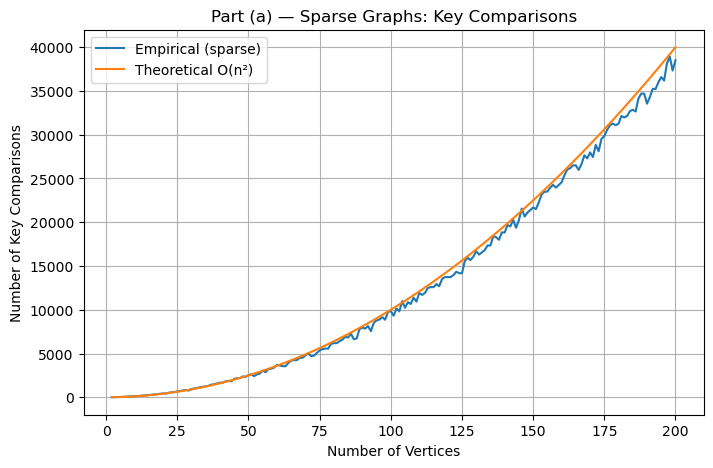

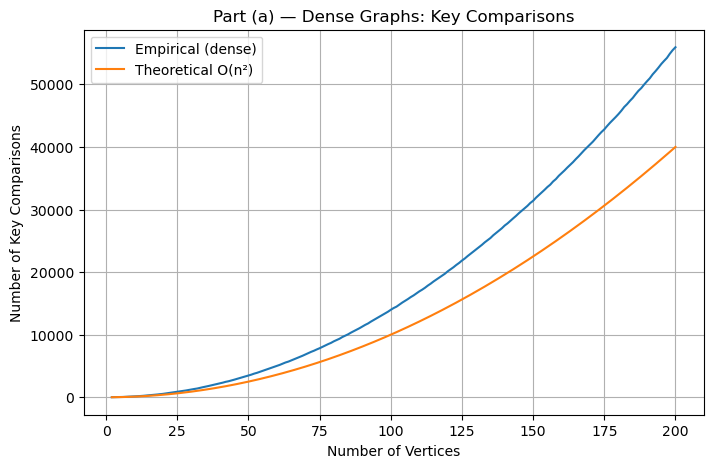

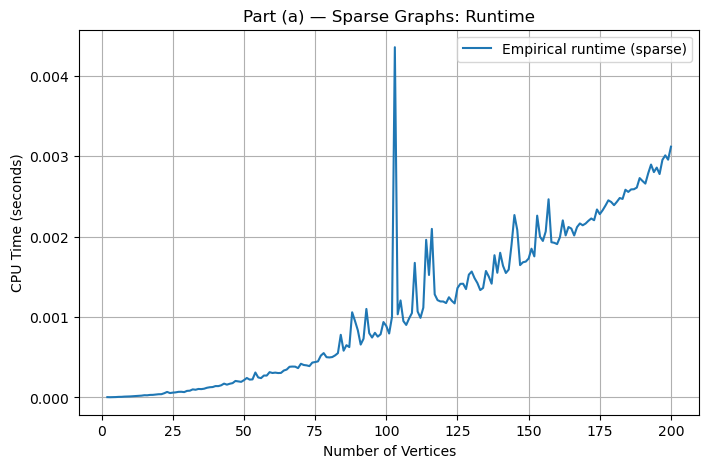

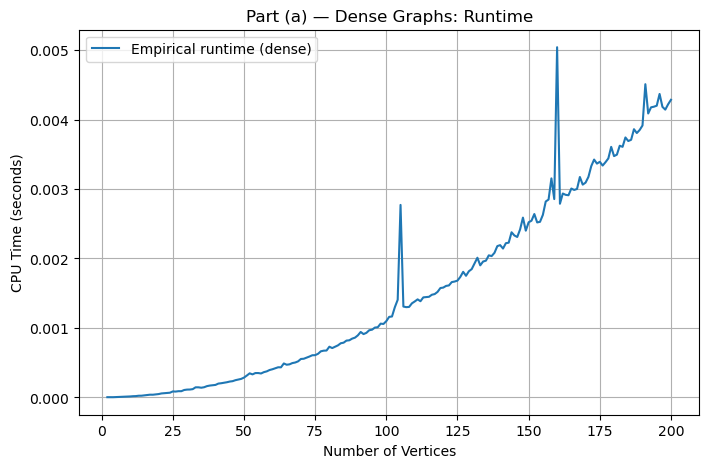


✅ All results saved to 'part_a_results.csv'


In [106]:
def run_a(n_values, runs=3, avg_deg=3):
    num_runs = runs

    comparisons_sparse_all_runs = []
    times_sparse_all_runs = []
    edge_sparse_all_runs = []

    comparisons_dense_all_runs = []
    times_dense_all_runs = []
    edge_dense_all_runs = []

    # sparse graph:
    for run in range(num_runs):
        comparison_run = []
        time_run = []
        edge_run = []
        for n in n_values:
            W_sparse = gen_matrix(n, p=min(1, avg_deg/(n-1)))
            edge_run.append(count_edges_matrix(W_sparse))
            reset_comparison_count()
            start_time = time.time()
            d, pi, S = dijkstra_matrix(W_sparse, 0)
            end_time = time.time()
            comparison_run.append(get_comparison_count())
            time_run.append(end_time - start_time)
        comparisons_sparse_all_runs.append(comparison_run)
        times_sparse_all_runs.append(time_run)
        edge_sparse_all_runs.append(edge_run)

    # dense graph:
    for run in range(num_runs):
        comparison_run = []
        time_run = []
        edge_run = []
        for n in n_values:
            W_dense = gen_matrix(n, p=0.8)
            edge_run.append(count_edges_matrix(W_dense))
            reset_comparison_count()
            start_time = time.time()
            d, pi, S = dijkstra_matrix(W_dense, 0)
            end_time = time.time()
            comparison_run.append(get_comparison_count())
            time_run.append(end_time - start_time)
        comparisons_dense_all_runs.append(comparison_run)
        times_dense_all_runs.append(time_run)
        edge_dense_all_runs.append(edge_run)


    print("Sparse Graph: ")
    for row in W_sparse:
        print(row)

    print("Dense Graph:")
    for row in W_dense:
        print(row)
        
    return comparisons_sparse_all_runs, times_sparse_all_runs, edge_sparse_all_runs, comparisons_dense_all_runs, times_dense_all_runs, edge_dense_all_runs

    
# values of n 
n_values = []
n_values = list(range(2, 201))

comparisons_sparse_all_runs, times_sparse_all_runs, edge_sparse_all_runs, comparisons_dense_all_runs, times_dense_all_runs, edge_dense_all_runs = run_a(n_values)

# Calculate statistics for sparse graph
comparisons_mean_sparse = np.mean(comparisons_sparse_all_runs, axis=0)
comparisons_std_sparse = np.std(comparisons_sparse_all_runs, axis=0)

time_mean_sparse = np.mean(times_sparse_all_runs, axis=0)
time_std_sparse = np.std(times_sparse_all_runs, axis=0)

edge_mean_sparse = np.mean(edge_sparse_all_runs, axis=0)
edge_std_sparse = np.std(edge_sparse_all_runs, axis=0)

# Calculate statistics for sparse graph
comparisons_mean_dense = np.mean(comparisons_dense_all_runs, axis=0)
comparisons_std_dense = np.std(comparisons_dense_all_runs, axis=0)

time_mean_dense = np.mean(times_dense_all_runs, axis=0)
time_std_dense = np.std(times_dense_all_runs, axis=0)

edge_mean_dense = np.mean(edge_dense_all_runs, axis=0)
edge_std_dense = np.std(edge_dense_all_runs, axis=0)

# Calculate theoretical values
theoretical_comparisons = [n*n for n in n_values]

# Scale theoretical values for sparse
scale_sparse = max(comparisons_mean_sparse) / max(theoretical_comparisons)
theoretical_scaled_sparse = [t * scale_sparse for t in theoretical_comparisons]

# Scale theoretical values for dense
scale_dense = max(comparisons_mean_dense) / max(theoretical_comparisons)
theoretical_scaled_dense = [t * scale_dense for t in theoretical_comparisons]

# ---- Plot 1: Key Comparisons (Sparse) ----
plt.figure(figsize=(8,5))
plt.plot(n_values, comparisons_mean_sparse, label="Empirical (sparse)")
plt.plot(n_values, theoretical_comparisons, label='Theoretical O(n²)')
plt.xlabel("Number of Vertices")
plt.ylabel("Number of Key Comparisons")
plt.title("Part (a) — Sparse Graphs: Key Comparisons")
plt.legend(); plt.grid(True); plt.show()

# ---- Plot 2: Key Comparisons (Dense) ----
plt.figure(figsize=(8,5))
plt.plot(n_values, comparisons_mean_dense, label="Empirical (dense)")
plt.plot(n_values, theoretical_comparisons, label='Theoretical O(n²)')
plt.xlabel("Number of Vertices")
plt.ylabel("Number of Key Comparisons")
plt.title("Part (a) — Dense Graphs: Key Comparisons")
plt.legend(); plt.grid(True); plt.show()

# ---- Plot 3: Runtime (Sparse) ----
plt.figure(figsize=(8,5))
plt.plot(n_values, time_mean_sparse, label="Empirical runtime (sparse)")
plt.xlabel("Number of Vertices")
plt.ylabel("CPU Time (seconds)")
plt.title("Part (a) — Sparse Graphs: Runtime")
plt.legend(); plt.grid(True); plt.show()

# ---- Plot 4: Runtime (Dense) ----
plt.figure(figsize=(8,5))
plt.plot(n_values, time_mean_dense, label="Empirical runtime (dense)")
plt.xlabel("Number of Vertices")
plt.ylabel("CPU Time (seconds)")
plt.title("Part (a) — Dense Graphs: Runtime")
plt.legend(); plt.grid(True); plt.show()



# --- export all results for Part (a) to CSV ---
output_file = "part_a_results.csv"

with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([
        "GraphType", "|V|", "|E| (mean)", "Density",
        "EmpTime(s)", "±StdTime", "EmpComp", "±StdComp",
        "TheoreticalTerm(V^2)", "Time/V^2", "Comp/V^2"
    ])

    # sparse rows
    for i, V in enumerate(n_values):
        E = edge_mean_sparse[i]
        density = E / (V * (V - 1)) if V > 1 else 0.0
        writer.writerow([
            "Sparse", V, int(E), f"{density:.4f}",
            f"{time_mean_sparse[i]:.6f}", f"{time_std_sparse[i]:.6f}",
            int(comparisons_mean_sparse[i]), f"{comparisons_std_sparse[i]:.2f}",
            f"{V**2:.1f}",
            f"{time_mean_sparse[i]/(V**2):.9f}",
            f"{comparisons_mean_sparse[i]/(V**2):.6f}"
        ])

    # dense rows
    for i, V in enumerate(n_values):
        E = edge_mean_dense[i]
        density = E / (V * (V - 1)) if V > 1 else 0.0
        writer.writerow([
            "Dense", V, int(E), f"{density:.4f}",
            f"{time_mean_dense[i]:.6f}", f"{time_std_dense[i]:.6f}",
            int(comparisons_mean_dense[i]), f"{comparisons_std_dense[i]:.2f}",
            f"{V**2:.1f}",
            f"{time_mean_dense[i]/(V**2):.9f}",
            f"{comparisons_mean_dense[i]/(V**2):.6f}"
        ])

print(f"\n✅ All results saved to '{output_file}'")



**Analysis:**

1. **Extract-min**:
    - We scan through all unvisited vertices to find the smallest distance.
        - Cost per iteration: O(n) --> Assume worst-case
        - Total across all vertices: O(n^2)
2. **Relaxation**:
    - For each extracted vertex, we check all other vertices in its row (even if no edge exists)
        - Cost per vertex: O(n)
        - Total across all vertices: O(n^2)

**Total Time**: T(n,m)=O(n^2)+O(n^2)=Θ(n^2)
--> independent of m

**PART (b)**

**1. Generate the adjacency list**

In [107]:
def gen_graph_connected(V, seed=42, avg_deg=3, weight_range=(1,10)):
    random.seed(seed)
    E_target = V * avg_deg                       # desired edges (directed)
    E_max = V * (V - 1)                          # max possible (no self-loops)
    E_target = min(E_target, E_max)              # cap to what's possible

    # adjacency list and a set to track edges
    g = {u: [] for u in range(1, V+1)}
    edges = set()

    # 1) Backbone path to guarantee reachability
    order = list(range(1, V+1))
    random.shuffle(order)
    for i in range(V - 1):
        u, v = order[i], order[i+1]
        if (u, v) not in edges:
            w = random.randint(*weight_range)
            g[u].append((v, w))
            edges.add((u, v))

    # 2) Fill remaining edges without duplicates until E_target
    candidates = []
    for u in range(1, V+1):
        for v in range(1, V+1):
            if u != v and (u, v) not in edges:
                candidates.append((u, v))
    random.shuffle(candidates)

    need = E_target - len(edges)
    for i in range(max(0, need)):
        u, v = candidates[i]
        w = random.randint(*weight_range)
        g[u].append((v, w))
        edges.add((u, v))

    E_actual = len(edges)
    return g, E_actual


**2. Implement the Algorithm**

In [108]:
def dijkstra_list_heap(adj_list, start):
    global comparison_count
    n = len(adj_list)
    d = {node: INF for node in adj_list.keys()}
    d[start] = 0
    pi = {node: None for node in adj_list.keys()}
    S = set()

    heap = []
    heapq.heappush(heap, (0, start))

    while heap and len(S) < len(adj_list):
        dist_u, u = heapq.heappop(heap)
        # heap pop internally does about log(V) comparisons, estimate that:
        add_comparison(math.ceil(math.log2(max(2, len(heap)))))
        if u in S:
            continue
        S.add(u)

        for v, w in adj_list[u]:
            add_comparison(1)        # comparison for v not in S

            if v in S:
                continue

            new_dist = dist_u + w
            add_comparison(1)    # comparison for new_dist < d[v]
            if new_dist < d[v]:
                d[v] = new_dist
                pi[v] = u
                heapq.heappush(heap, (d[v], v))

    return d, pi, S

- Implement S as a set (O(1) cost on average) instead of a list (O(n) cost for worst case)
    - In list, Python scans the list from start to end, comparing each element until it finds a match (or reaches the end)
    - In contrast, a set is implemented as a hash table lookup, therefore it is more efficient


2. Implement the algorithm and print result

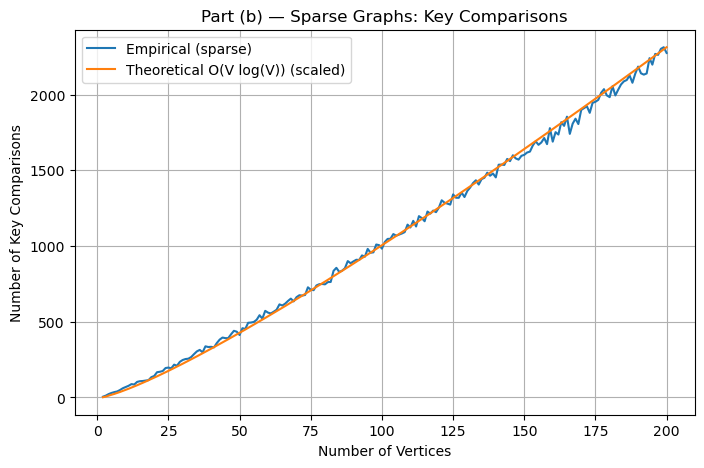

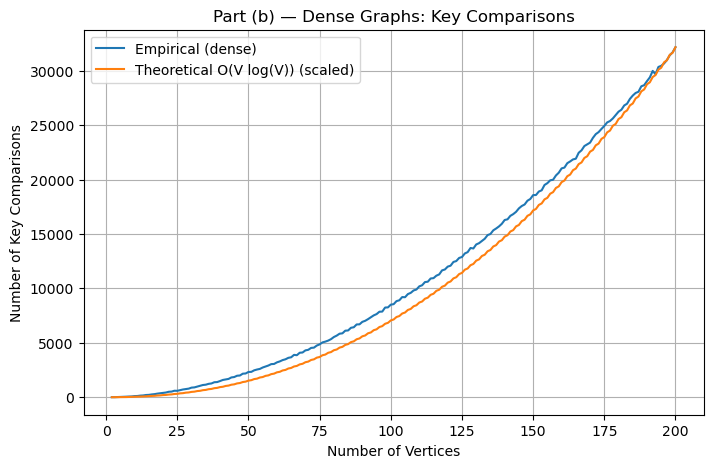

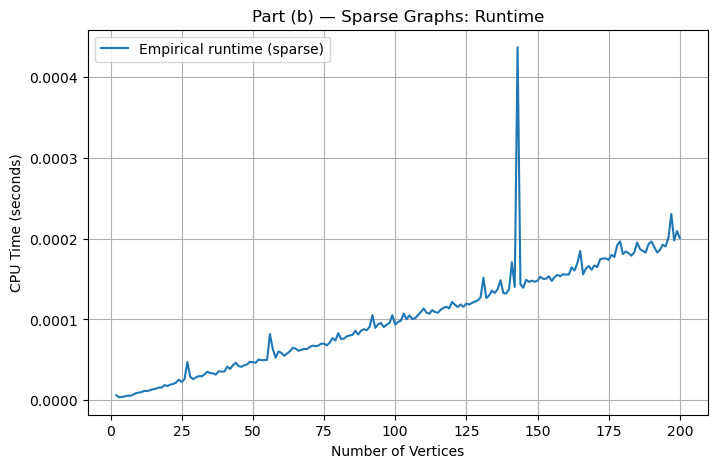

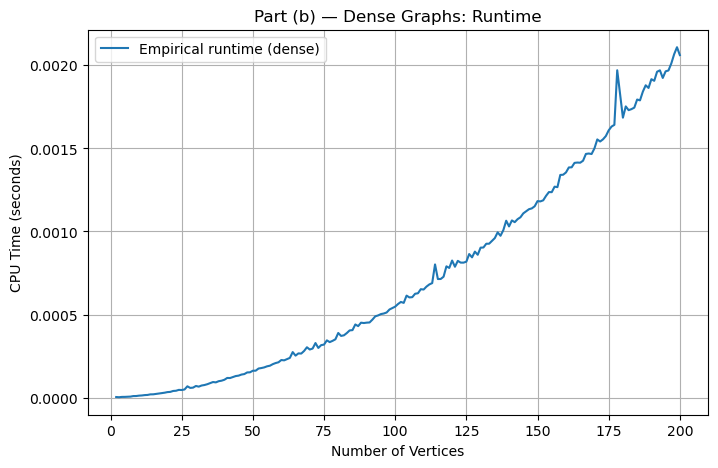


✅ All results saved to 'part_b_results.csv'


In [109]:
def run_b(n_values, runs=3, avg_deg_sparse=3, avg_deg_dense_factor=0.5):
    num_runs = runs
    comparisons_sparse_all_runs = []
    times_sparse_all_runs = []
    edges_sparse_all_runs = []

    comparisons_dense_all_runs = []
    times_dense_all_runs = []
    edges_dense_all_runs = []

    # sparse graph:
    for run in range(num_runs):
        comparison_run = []
        time_run = []
        edge_run = []
        for n in n_values:
            adj_list_sparse, edge_sparse = gen_graph_connected(n, seed=1000 + run*100 + n, avg_deg=avg_deg_sparse)
            reset_comparison_count()
            start_time = time.time()
            d, pi, S = dijkstra_list_heap(adj_list_sparse, start=1)
            end_time = time.time()
            comparison_run.append(get_comparison_count())
            time_run.append(end_time - start_time)
            edge_run.append(edge_sparse)
        comparisons_sparse_all_runs.append(comparison_run)
        times_sparse_all_runs.append(time_run)
        edges_sparse_all_runs.append(edge_run)

    # dense graph:
    for run in range(num_runs):
        comparison_run = []
        time_run = []
        edge_run = []
        for n in n_values:
            avg_deg_dense = max(1, int(n * avg_deg_dense_factor))  # ≈ V/2
            adj_list_dense, edge_dense = gen_graph_connected(n, seed=2000 + run*100 + n, avg_deg=avg_deg_dense)
            reset_comparison_count()
            start_time = time.time()
            d, pi, S = dijkstra_list_heap(adj_list_dense, start=1)
            end_time = time.time()
            comparison_run.append(get_comparison_count())
            time_run.append(end_time - start_time)
            edge_run.append(edge_dense)
        comparisons_dense_all_runs.append(comparison_run)
        times_dense_all_runs.append(time_run)
        edges_dense_all_runs.append(edge_run)

    return comparisons_sparse_all_runs, times_sparse_all_runs, edges_sparse_all_runs, comparisons_dense_all_runs, times_dense_all_runs, edges_dense_all_runs

    
# values of n 
n_values = list(range(2, 201))

comparisons_sparse_all_runs, times_sparse_all_runs, edges_sparse_all_runs, comparisons_dense_all_runs, times_dense_all_runs, edges_dense_all_runs = run_b(n_values)

# Calculate statistics for sparse graph
comparisons_mean_sparse = np.mean(comparisons_sparse_all_runs, axis=0)
comparisons_std_sparse = np.std(comparisons_sparse_all_runs, axis=0)

time_mean_sparse = np.mean(times_sparse_all_runs, axis=0)
time_std_sparse = np.std(times_sparse_all_runs, axis=0)

edge_mean_sparse = np.mean(edges_sparse_all_runs, axis=0)

# Calculate statistics for sparse graph
comparisons_mean_dense = np.mean(comparisons_dense_all_runs, axis=0)
comparisons_std_dense = np.std(comparisons_dense_all_runs, axis=0)

time_mean_dense = np.mean(times_dense_all_runs, axis=0)
time_std_dense = np.std(times_dense_all_runs, axis=0)

edge_mean_dense = np.mean(edges_dense_all_runs, axis=0)

# Calculate theoretical values
theoretical_sparse = [(V + E) * math.log2(max(2, V)) for V, E in zip(n_values, edge_mean_sparse)]
theoretical_dense  = [(V + E) * math.log2(max(2, V)) for V, E in zip(n_values, edge_mean_dense)]

# Scale theoretical values 
scale_cmp_sparse = max(comparisons_mean_sparse) / max(theoretical_sparse)
scale_cmp_dense  = max(comparisons_mean_dense)  / max(theoretical_dense)

theo_cmp_sparse_scaled = [t * scale_cmp_sparse for t in theoretical_sparse]
theo_cmp_dense_scaled  = [t * scale_cmp_dense  for t in theoretical_dense]

# ---- Plot 1: Key Comparisons (Sparse) ----
plt.figure(figsize=(8,5))
plt.plot(n_values, comparisons_mean_sparse, label="Empirical (sparse)")
plt.plot(n_values, theo_cmp_sparse_scaled, label='Theoretical O(V log(V)) (scaled)')
plt.xlabel("Number of Vertices")
plt.ylabel("Number of Key Comparisons")
plt.title("Part (b) — Sparse Graphs: Key Comparisons")
plt.legend(); plt.grid(True); plt.show()

# ---- Plot 2: Key Comparisons (Dense) ----
plt.figure(figsize=(8,5))
plt.plot(n_values, comparisons_mean_dense, label="Empirical (dense)")
plt.plot(n_values, theo_cmp_dense_scaled, label='Theoretical O(V log(V)) (scaled)')
plt.xlabel("Number of Vertices")
plt.ylabel("Number of Key Comparisons")
plt.title("Part (b) — Dense Graphs: Key Comparisons")
plt.legend(); plt.grid(True); plt.show()

# ---- Plot 3: Runtime (Sparse) ----
plt.figure(figsize=(8,5))
plt.plot(n_values, time_mean_sparse, label="Empirical runtime (sparse)")
plt.xlabel("Number of Vertices")
plt.ylabel("CPU Time (seconds)")
plt.title("Part (b) — Sparse Graphs: Runtime")
plt.legend(); plt.grid(True); plt.show()

# ---- Plot 4: Runtime (Dense) ----
plt.figure(figsize=(8,5))
plt.plot(n_values, time_mean_dense, label="Empirical runtime (dense)")
plt.xlabel("Number of Vertices")
plt.ylabel("CPU Time (seconds)")
plt.title("Part (b) — Dense Graphs: Runtime")
plt.legend(); plt.grid(True); plt.show()

# --- export all results for Part (b) to CSV ---
output_file_b = "part_b_results.csv"

with open(output_file_b, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([
        "GraphType", "|V|", "|E| (mean)", "Density",
        "EmpTime(s)", "±StdTime", "EmpComp", "±StdComp",
        "TheoreticalTerm((V+E)logV)", "Time/((V+E)logV)", "Comp/((V+E)logV)"
    ])

    # sparse rows
    for i, V in enumerate(n_values):
        E = edge_mean_sparse[i]
        density = E / (V * (V - 1)) if V > 1 else 0.0
        theory = (V + E) * math.log2(max(2, V))
        writer.writerow([
            "Sparse", V, int(E), f"{density:.4f}",
            f"{time_mean_sparse[i]:.6f}", f"{time_std_sparse[i]:.6f}",
            int(comparisons_mean_sparse[i]), f"{comparisons_std_sparse[i]:.2f}",
            f"{theory:.1f}",
            f"{time_mean_sparse[i]/theory:.9f}",
            f"{comparisons_mean_sparse[i]/theory:.6f}"
        ])

    # dense rows
    for i, V in enumerate(n_values):
        E = edge_mean_dense[i]
        density = E / (V * (V - 1)) if V > 1 else 0.0
        theory = (V + E) * math.log2(max(2, V))
        writer.writerow([
            "Dense", V, int(E), f"{density:.4f}",
            f"{time_mean_dense[i]:.6f}", f"{time_std_dense[i]:.6f}",
            int(comparisons_mean_dense[i]), f"{comparisons_std_dense[i]:.2f}",
            f"{theory:.1f}",
            f"{time_mean_dense[i]/theory:.9f}",
            f"{comparisons_mean_dense[i]/theory:.6f}"
        ])

print(f"\n✅ All results saved to '{output_file_b}'")



**Analysis:**

Assume worst-case
1. **Extract-min**:
    - Each pop from the heap is O(log n)
        - There are at most O(n + m) pushes/pops total
        - Total extract-min + pushes: O((n + m)log n)
2. **Relaxation**:
    - Only iterate over real neighbors (sum of degrees = m).
        - Total neighbor checks: O(m)

**Total Time**: T(n,m)=O((n + m)log n)
--> much faster when m << n^2

Sparse Graph: 
[0, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 3, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 2, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 6, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 1, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,

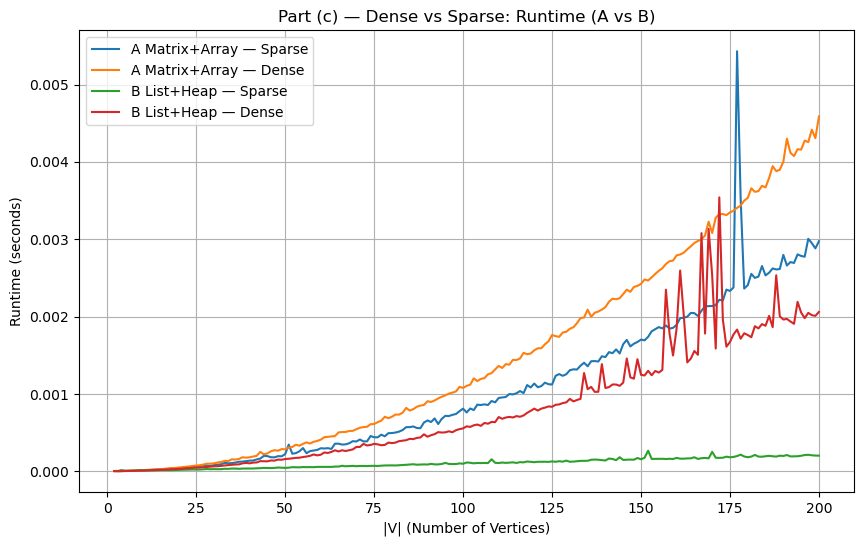

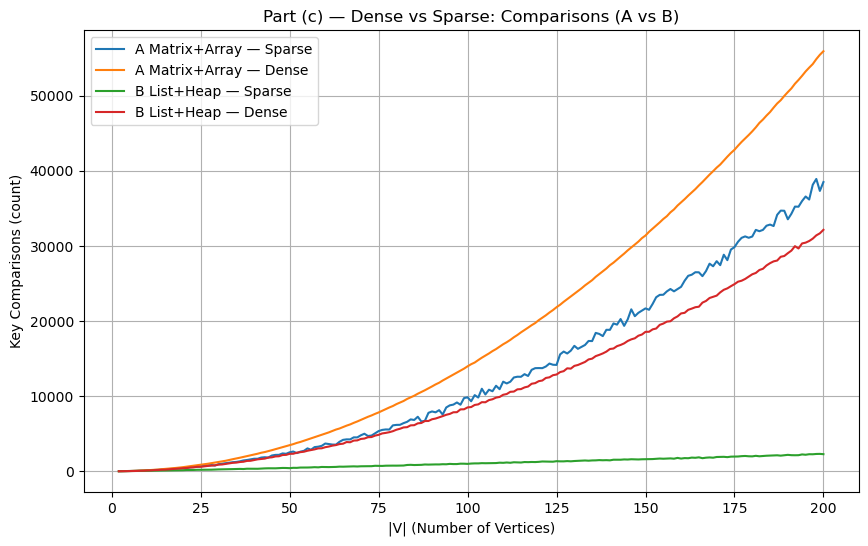

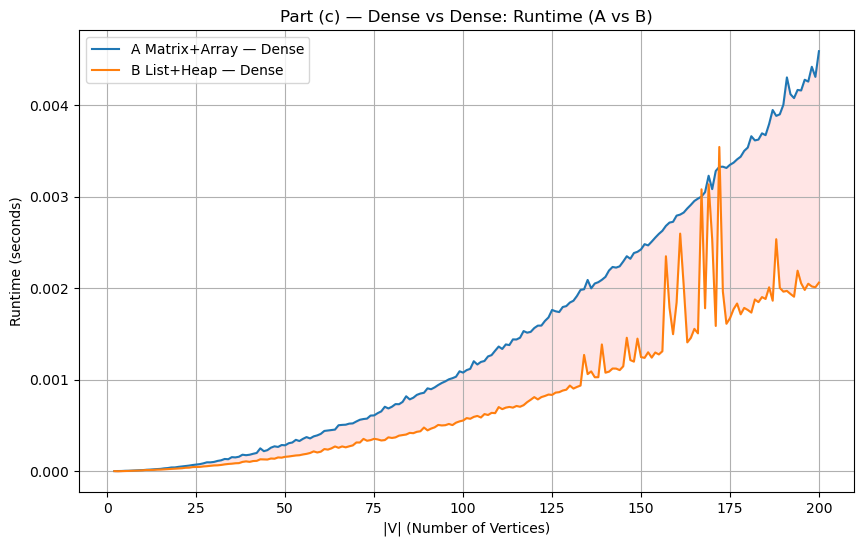

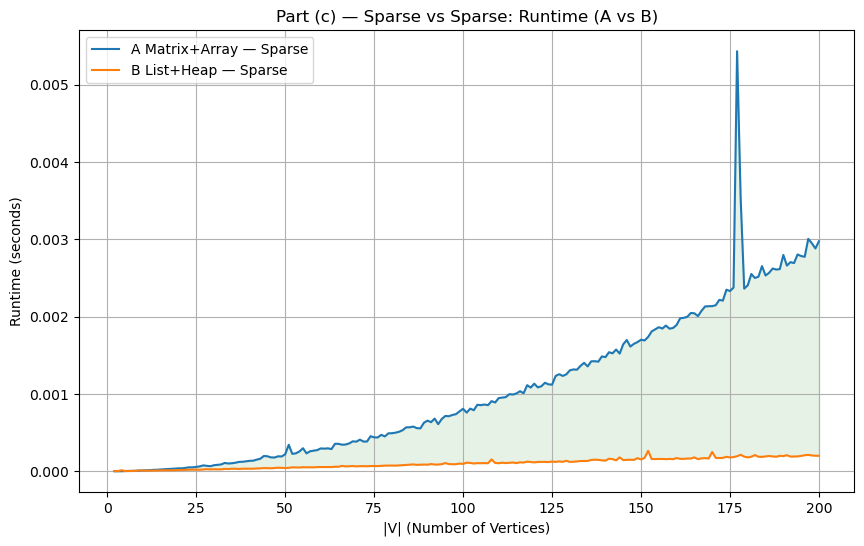

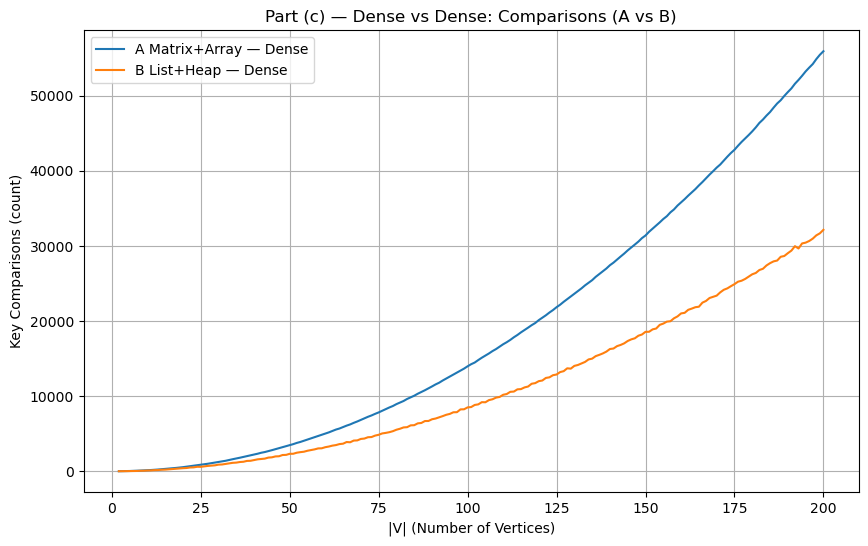

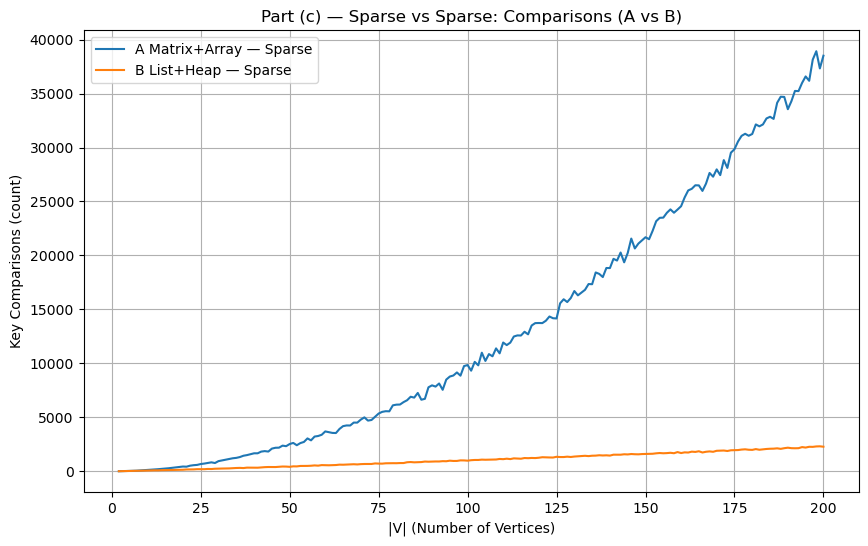


All results saved to output_file_c


In [110]:
# =========================
# Part (c): Side-by-side comparisons
# =========================

# --- choose sizes; use the same list for A and B so curves line up ---
n_values = list(range(2, 201))   # tweak if you want a bigger range

# --- run Part (a) again to get A-prefixed stats ---
(a_cmp_sparse_runs, a_time_sparse_runs, a_edge_sparse_runs,
a_cmp_dense_runs,  a_time_dense_runs, a_edge_dense_runs) = run_a(n_values)

a_cmp_sparse_mean = np.mean(a_cmp_sparse_runs, axis=0)
a_cmp_dense_mean  = np.mean(a_cmp_dense_runs,  axis=0)
a_time_sparse_mean = np.mean(a_time_sparse_runs, axis=0)
a_time_dense_mean  = np.mean(a_time_dense_runs,  axis=0)
a_edge_sparse_mean = np.mean(a_edge_sparse_runs, axis=0)
a_edge_dense_mean = np.mean(a_edge_dense_runs, axis=0)

# --- run Part (b) to get B-prefixed stats ---
(b_cmp_sparse_runs, b_time_sparse_runs, b_edge_sparse_runs,
b_cmp_dense_runs,  b_time_dense_runs,  b_edge_dense_runs) = run_b(n_values, runs=3, avg_deg_sparse=3, avg_deg_dense_factor=0.5)

b_cmp_sparse_mean = np.mean(b_cmp_sparse_runs, axis=0)
b_cmp_dense_mean  = np.mean(b_cmp_dense_runs,  axis=0)
b_time_sparse_mean = np.mean(b_time_sparse_runs, axis=0)
b_time_dense_mean  = np.mean(b_time_dense_runs,  axis=0)
b_edge_sparse_mean = np.mean(b_edge_sparse_runs, axis=0)
b_edge_dense_mean = np.mean(b_edge_dense_runs, axis=0)

# ---------------------------
# 1) Dense vs Sparse — compare RUNTIME for A and B (all four on one plot)
# ---------------------------
plt.figure(figsize=(10,6))
plt.plot(n_values, a_time_sparse_mean, label="A Matrix+Array — Sparse")
plt.plot(n_values, a_time_dense_mean,  label="A Matrix+Array — Dense")
plt.plot(n_values, b_time_sparse_mean, label="B List+Heap — Sparse")
plt.plot(n_values, b_time_dense_mean,  label="B List+Heap — Dense")
plt.xlabel("|V| (Number of Vertices)")
plt.ylabel("Runtime (seconds)")
plt.title("Part (c) — Dense vs Sparse: Runtime (A vs B)")
plt.legend(); plt.grid(True); plt.show()

# ---------------------------
# 2) Dense vs Sparse — compare COMPARISONS for A and B (all four on one plot)
# ---------------------------
plt.figure(figsize=(10,6))
plt.plot(n_values, a_cmp_sparse_mean, label="A Matrix+Array — Sparse")
plt.plot(n_values, a_cmp_dense_mean,  label="A Matrix+Array — Dense")
plt.plot(n_values, b_cmp_sparse_mean, label="B List+Heap — Sparse")
plt.plot(n_values, b_cmp_dense_mean,  label="B List+Heap — Dense")
plt.xlabel("|V| (Number of Vertices)")
plt.ylabel("Key Comparisons (count)")
plt.title("Part (c) — Dense vs Sparse: Comparisons (A vs B)")
plt.legend(); plt.grid(True); plt.show()

# ---------------------------
# 3) Dense vs Dense — compare RUNTIME for A vs B (just the dense curves)
# ---------------------------
plt.figure(figsize=(10,6))
plt.plot(n_values, a_time_dense_mean, label="A Matrix+Array — Dense")
plt.plot(n_values, b_time_dense_mean, label="B List+Heap — Dense")
plt.xlabel("|V| (Number of Vertices)")
plt.ylabel("Runtime (seconds)")
plt.title("Part (c) — Dense vs Dense: Runtime (A vs B)")
plt.fill_between(n_values, a_time_dense_mean, b_time_dense_mean, color="red", alpha=0.1)
plt.legend(); plt.grid(True); plt.show()

# ---------------------------
# 4) Sparse vs Sparse — compare RUNTIME for A vs B (just the sparse curves)
# ---------------------------
plt.figure(figsize=(10,6))
plt.plot(n_values, a_time_sparse_mean, label="A Matrix+Array — Sparse")
plt.plot(n_values, b_time_sparse_mean, label="B List+Heap — Sparse")
plt.xlabel("|V| (Number of Vertices)")
plt.ylabel("Runtime (seconds)")
plt.title("Part (c) — Sparse vs Sparse: Runtime (A vs B)")
plt.fill_between(n_values, a_time_sparse_mean, b_time_sparse_mean, color="green", alpha=0.1)
plt.legend(); plt.grid(True); plt.show()

# ---------------------------
# 5) Dense vs Dense — compare COMPARISONS for A vs B (just the sparse curves)
# ---------------------------
plt.figure(figsize=(10,6))
plt.plot(n_values, a_cmp_dense_mean, label="A Matrix+Array — Dense")
plt.plot(n_values, b_cmp_dense_mean, label="B List+Heap — Dense")
plt.xlabel("|V| (Number of Vertices)")
plt.ylabel("Key Comparisons (count)")
plt.title("Part (c) — Dense vs Dense: Comparisons (A vs B)")
plt.legend(); plt.grid(True); plt.show()

# ---------------------------
# 6) Sparse vs Sparse — compare COMPARISONS for A vs B (just the sparse curves)
# ---------------------------
plt.figure(figsize=(10,6))
plt.plot(n_values, a_cmp_sparse_mean, label="A Matrix+Array — Sparse")
plt.plot(n_values, b_cmp_sparse_mean, label="B List+Heap — Sparse")
plt.xlabel("|V| (Number of Vertices)")
plt.ylabel("Key Comparisons (count)")
plt.title("Part (c) — Sparse vs Sparse: Comparisons (A vs B)")
plt.legend(); plt.grid(True); plt.show()

# --- export all results for Part (c) to CSV ---
output_file_c = "part_c_results.csv"

with open(output_file_c, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([
        "GraphType", "|V|", "|E| (a)", "Comparisons (a)", "Time (a)", 
        "|E| (b)", "Comparisons (b)", "Time (b)", "Speedup A/B"
    ])

    # --- Sparse rows ---
    for i, V in enumerate(n_values):
        E_a = int(a_edge_sparse_mean[i])
        E_b = int(b_edge_sparse_mean[i])
        cmp_a = int(a_cmp_sparse_mean[i])
        cmp_b = int(b_cmp_sparse_mean[i])
        time_a = float(a_time_sparse_mean[i])
        time_b = float(b_time_sparse_mean[i])
        speedup_sparce = time_a / time_b if time_b > 0 else float('inf')

        writer.writerow(["Sparse", V, E_a, cmp_a, f"{time_a:.6f}", E_b, cmp_b, f"{time_b:.6f}", f"{speedup_sparce:.6f}"])

    # --- Dense rows ---
    for i, V in enumerate(n_values):
        E_a = int(a_edge_dense_mean[i])
        E_b = int(b_edge_dense_mean[i])
        cmp_a = int(a_cmp_dense_mean[i])
        cmp_b = int(b_cmp_dense_mean[i])
        time_a = float(a_time_dense_mean[i])
        time_b = float(b_time_dense_mean[i])
        speedup_dense = time_a / time_b if time_b > 0 else float('inf')

        writer.writerow(["Dense", V, E_a, cmp_a, f"{time_a:.6f}", E_b, cmp_b, f"{time_b:.6f}", f"{speedup_dense:.6f}"])


print(f"\nAll results saved to output_file_c")